## 1. Introduction

The modern Olympic Games are leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are held every four years, with the Summer and Winter Games alternating by occurring every four years but two years apart.

Their creation was inspired by the ancient Olympic Games, which can be traced back to 776 BC. They were dedicated to the Olympian gods and were staged on the ancient plains of Olympia. They continued for nearly 12 centuries, until Emperor Theodosius decreed in 393 A.D. that all such "pagan cults" be banned.

In this kernel, my goal is to show how the Olympic Games have developed over the years, changing participation trends, effects of major geopolitical events, most popular sports, uncommon events that occured, et al.

The data was scrapped by [**Randi H Griffin**](https://www.kaggle.com/heesoo37) from www.sports-reference.com and can be found [here](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home)

## 2. Preparation

### 2.1 Importing modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir("input"))

plt.style.use('ggplot')
%matplotlib inline

['athlete_events.csv', 'noc_regions.csv']


In [2]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


### 2.2 Importing files

In [3]:
PATH = 'input/'
events = pd.read_csv(f'{PATH}athlete_events.csv')
regions = pd.read_csv(f'{PATH}noc_regions.csv')

### 2.3 Basic Exploration

In [4]:
events.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [5]:
regions.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

Let's join both the tables on the 'NOC' column.

In [6]:
data = pd.merge(events, regions, how='left', on='NOC')
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

Let's look at missing values in the dataset.

In [7]:
data.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

In [8]:
data[data.region.isnull() == True].Team.unique()

array(['Singapore', 'Refugee Olympic Athletes', 'June Climene', 'Unknown',
       'Tuvalu', 'Rika II', 'Singapore-2', 'Singapore-1'], dtype=object)

Let's fill up the region column of teams with 'Singapore', 'Singapore-2' and 'Singapore-1' names as 'Singapore'. Also, fill up values for 'Tuvalu'

In [9]:
data.loc[(data.Team == 'Singapore') | (data.Team == 'Singapore-1') | (data.Team =='Singapore-2'), 'region'] = 'Singapore'
data.loc[(data.Team == 'Tuvalu'), 'region'] = 'Tuvalu'

In [10]:
data[data.region.isnull() == True].Team.value_counts()

Refugee Olympic Athletes    12
Rika II                      4
June Climene                 3
Unknown                      2
Name: Team, dtype: int64

Let's leave these as Unknown for region column as I'm not sure what country to put them in. (Even after thorough data exploration)

In [11]:
print(data.Age.isnull().sum())
print(data.Height.isnull().sum())
print(data.Weight.isnull().sum())

9474
60171
62875


There are so many missing values for 'Age', 'Height' and 'Weight' categories that we can't do anything but ignore them during our analysis. Also, assuming that the null values for the Medal column corresponds to Olympians who didn't win a medal, let's fill the NaN values for Medal to 'None'.

In [12]:
data.loc[data.Medal.isna(), 'Medal'] = 'None'

## 3. Participation statistics

### 3.1 Number of participating countries over years

In [13]:
len(data.region.unique())

208

So, we have 208 unique countries that have participated in the Olympics over the years. 

In [14]:
data.groupby(['Year','Season']).Season.count()

Year  Season
1896  Summer      380
1900  Summer     1936
1904  Summer     1301
1906  Summer     1733
1908  Summer     3101
1912  Summer     4040
1920  Summer     4292
1924  Summer     5233
      Winter      460
1928  Summer     4992
      Winter      582
1932  Summer     2969
      Winter      352
1936  Summer     6506
      Winter      895
1948  Summer     6405
      Winter     1075
1952  Summer     8270
      Winter     1088
1956  Summer     5127
      Winter     1307
1960  Summer     8119
      Winter     1116
1964  Summer     7702
      Winter     1778
1968  Summer     8588
      Winter     1891
1972  Summer    10304
      Winter     1655
1976  Summer     8641
      Winter     1861
1980  Summer     7191
      Winter     1746
1984  Summer     9454
      Winter     2134
1988  Summer    12037
      Winter     2639
1992  Summer    12977
      Winter     3436
1994  Winter     3160
1996  Summer    13780
1998  Winter     3605
2000  Summer    13821
2002  Winter     4109
2004  Summer    134

This shows that there is a disparity in how the summer and winter olympics were held in the same year before 1994, when they were separated to take place in gaps of 2 years. Let's separate the data according to seasons for further analysis.

In [15]:
summer_data = data[data.Season == 'Summer']
winter_data = data[data.Season == 'Winter']

Let's see the number of nations participating in the games in different seasons.

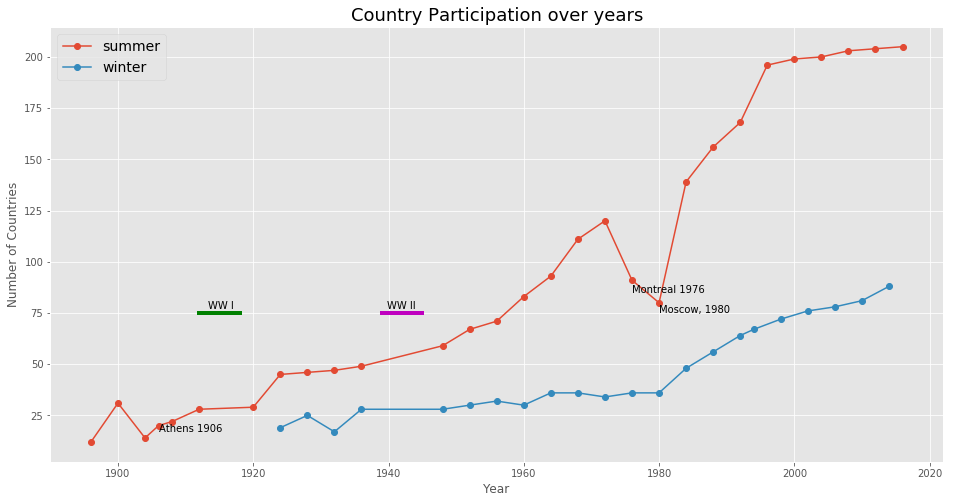

In [16]:
summer_data.groupby('Year').region.nunique().plot.line(figsize=(16,8), label = 'summer', marker = 'o')
winter_data.groupby('Year').region.nunique().plot.line(figsize=(16,8), label = 'winter', marker = 'o')
plt.title('Country Participation over years', fontsize=18)
plt.legend(loc='best',fontsize=14)
plt.ylabel('Number of Countries')
plt.text(1980,75,'Moscow, 1980')
plt.text(1976,85,'Montreal 1976')
plt.text(1906,17,'Athens 1906')
plt.text(1913.25, 77,'WW I')
plt.text(1939.75,77,'WW II')
plt.plot([1912,1918],[75,75],c='g',linewidth=4)
plt.plot([1939,1945],[75,75],c='m',linewidth=4)

The above figure has some interesting aspects. Let's look into the reasons for these events:
 - **Athens, 1906**: The 1906  Intercalated Games or 1906 Olympic Games was an international multi-sport event that was celebrated in Athens, Greece. Whilst medals were distributed to the participants during these games, the medals are not officially recognized by the IOC today.
 - **WW I**: No games were held in 1916 due WW I spanning from 1912-1920.
 - **WW II**: There was a twelve year hiatus (1936-1948), in which no Olympics were held due to WW II
 - **Montreal, 1976**: International politics played a part leading to low attendance due to boycott by 25 African Nations. They were all protesting New Zealand's sporting links with South Africa.
 - **Moscow, 1980**: International politics again played a part, as 66 nations refused to send teams to Moscow, protesting Soviet Invasion of Afghanistan.

### 3.2 Number of events over the years

Text(0,0.5,'Number of Events')

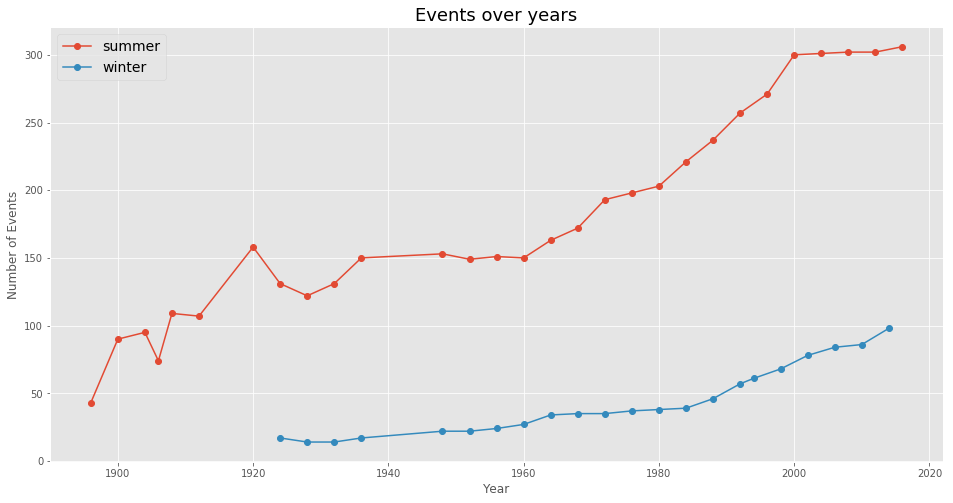

In [18]:
summer_data.groupby('Year').Event.nunique().plot.line(figsize=(16,8), label = 'summer', marker = 'o')
winter_data.groupby('Year').Event.nunique().plot.line(figsize=(16,8), label = 'winter', marker = 'o')
plt.title('Events over years', fontsize=18)
plt.legend(loc='best',fontsize=14)
plt.ylabel('Number of Events')

Features of the figure:
 - **Pre 1924**: Initially, the host countries decided the sporting schedule and hence a lot of sports such as Cricket(1900 – Paris), Croquet(1900 – Paris), Rackets(1908 – London), Tug of war(1900-1920), etc led a short life. In 1924, IOC assumed this role, hence standardizing the competetive sports.
 - **1924-2000**: A steady rise in the number of competitive games was seen from 1924 to the 2000 Olympics.
 - **Post 2000**: The growth of number of events levels off for the summer games at around 2004. This is probably due to the variety of games reaching a saturation point. (It cannot increase continuously!). 
 - **Winter vs Summer**: In all the above figures, we see that the values for winter games is comparatively lower than that of summer games. This is because of the less variety of winter games being available as well as the number of countries which participate in them being less, with the weather of Southern countries playing a part.

### 3.3 Number of athletes participating over the years

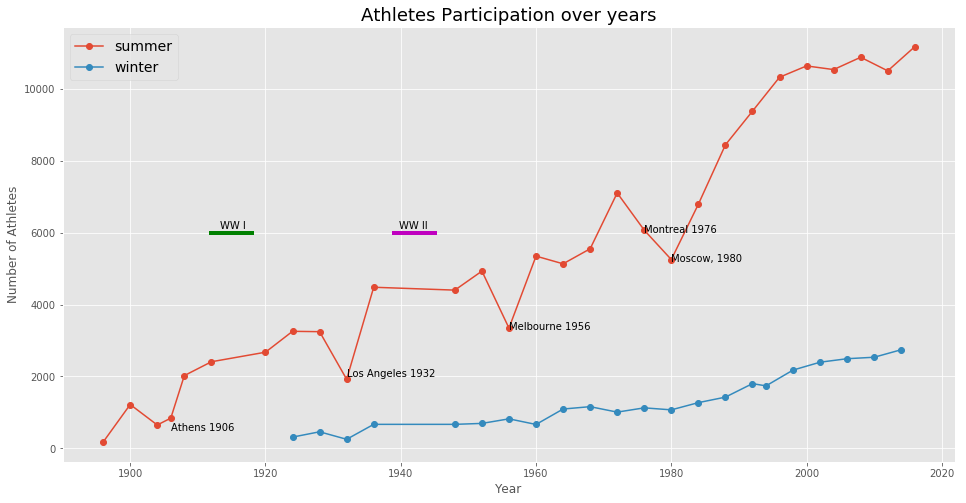

In [17]:
summer_data.groupby('Year').Name.nunique().plot.line(figsize=(16,8), label = 'summer', marker = 'o')
winter_data.groupby('Year').Name.nunique().plot.line(figsize=(16,8), label = 'winter', marker = 'o')
plt.title('Athletes Participation over years', fontsize=18)
plt.legend(loc='best',fontsize=14)
plt.ylabel('Number of Athletes')
plt.text(1980,5200,'Moscow, 1980')
plt.text(1976,6000,'Montreal 1976')
plt.text(1906,500,'Athens 1906')
plt.text(1932,2000,'Los Angeles 1932')
plt.text(1956,3300,'Melbourne 1956')
plt.text(1913.25, 6100,'WW I')
plt.text(1939.75,6100,'WW II')
plt.plot([1912,1918],[6000,6000],c='g',linewidth=4)
plt.plot([1939,1945],[6000,6000],c='m',linewidth=4)

We see some new characteristics in this figure. Let's look into them:
 - **Los Angeles 1932**: The Games were held during the worldwide Great Depression and many nations and athletes were unable to pay for the trip to Los Angeles; fewer than half the number of participants in the 1928 Summer Olympics in Amsterdam returned to compete in 1932.
 - **Melbourne 1956**: A number of International events played a part. Egypt, Iraq, and Lebanon announced that they would not participate in the Olympics in response to the Suez Crisis when Egypt was invaded by Israel, the United Kingdom, and France after Egypt nationalised the Suez canal. Meanwhile, in 1956 the Soviet Union crushed the Hungarian Revolution, and the Soviet presence at the Games led to the withdrawal of the Netherlands, Cambodia, Spain, and Switzerland. Less than two weeks before the 22 November opening ceremony, the People's Republic of China chose to boycott the event because the Republic of China had been allowed to compete. Although the number of countries participating (67) was almost the same as in 1952 (69), the number of athletes competing dropped sharply.

Let's do a deeper analysis of athletes participation!

### 3.4 Men vs Women participation over the years

In [56]:
male_summer = summer_data[summer_data.Sex == 'M']
female_summer = summer_data[summer_data.Sex == 'F']
male_winter = winter_data[winter_data.Sex == 'M']
female_winter = winter_data[winter_data.Sex == 'F']

Text(0,0.5,'Number of athletes')

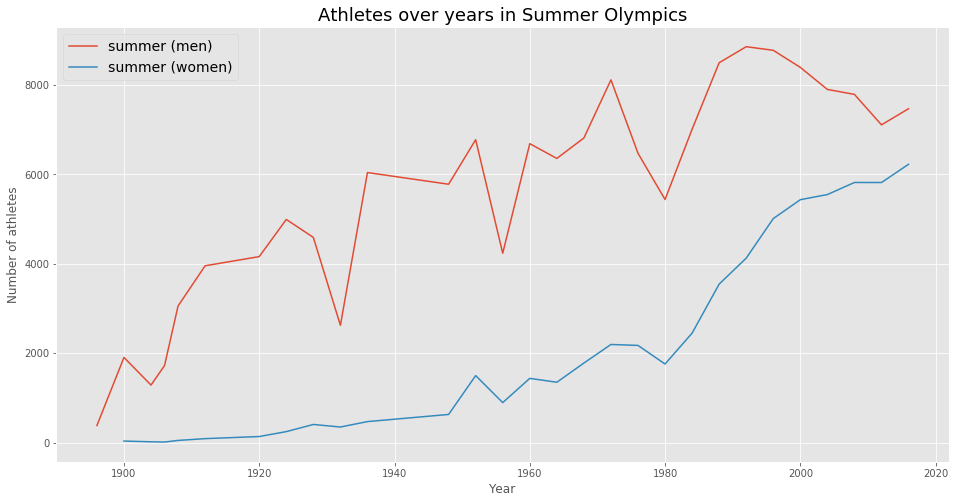

In [65]:
male_summer.groupby('Year').Sex.count().plot.line(figsize=(16,8), label = 'summer (men)')
female_summer.groupby('Year').Sex.count().plot.line(figsize=(16,8), label = 'summer (women)')
plt.title('Athletes over years in Summer Olympics', fontsize=18)
plt.legend(loc='best',fontsize=14)
plt.ylabel('Number of athletes')

Few characteristics of the figure above:
 - The first Olympic Games to feature female athletes was the 1900 Games in Paris, with **Hélène de Pourtalès** of Switzerland becoming the first woman to compete at the Olympic Games as well as the first female Olympic champion by being a part of the winning team in the first 1 to 2 ton sailing event.
 - Although, the rise in number of women partipants mirrored the rise in the number of men participation (proportional), the total number of women participating in the games have historically been low due to less events being open to women for participation. Moreover, perhaps as an indicator of the time, a lot of countries were skeptical in sending women athletes to Olympics. (We will dive into it a later point in the notebook.)
 - In 1990, **Ms Flor Isava Fonseca** was the first woman to be elected on to the IOC Executive Board. Subsequently, in 1991 , a historic decision was made by the IOC: Any new sport seeking to be included on the Olympic programme had to include women’s events. This has led to the women participation increasing dramatically in the Olympics from 1992, whereas the men participation has become stagnant/gone down due to the number of events reaching a saturation point and most countries trying to adequately represent participants (men and women) in all the events.

Text(1994,2000,'1994 Winter Olympics')

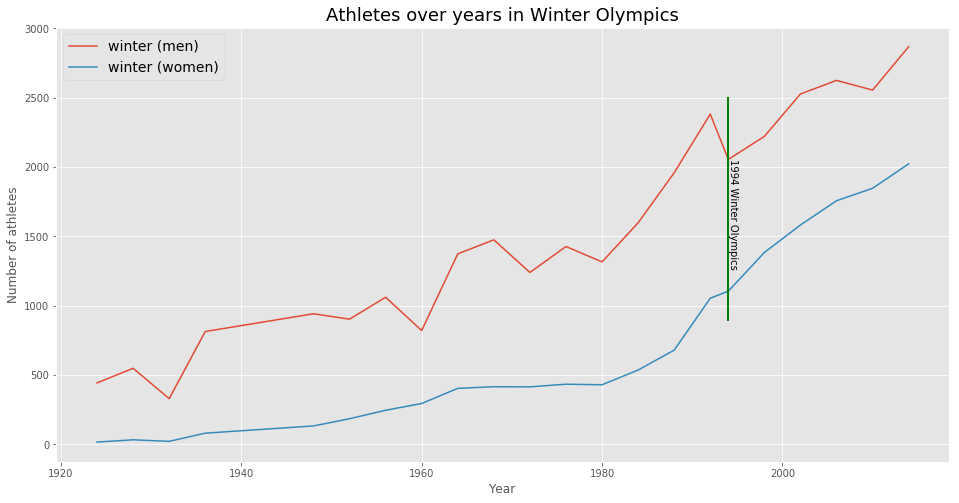

In [82]:
male_winter.groupby('Year').Sex.count().plot.line(figsize=(16,8), label = 'winter (men)')
female_winter.groupby('Year').Sex.count().plot.line(figsize=(16,8), label = 'winter (women)')
plt.title('Athletes over years in Winter Olympics', fontsize=18)
plt.legend(loc='best',fontsize=14)
plt.ylabel('Number of athletes')
plt.plot([1994,1994],[2500,900], c='g', linewidth=2)
plt.text(1994,2000,'1994 Winter Olympics', rotation = 270, fontsize=10)

Few characteristics of the above figure:
 - Only 11 female athletes participated in first Winter Olympics held in 1924 in Chamonix, all of them figure skaters.
 - Participation of both men and women athletes have been on the rise proportionally in winter olympics as more and more winter sport events are being added. 
 - Until 1992 the Winter and Summer Olympic Games were held in the same years, but in accordance with a 1986 decision by the IOC to place the Summer and Winter Games on separate four-year cycles in alternating even-numbered years, the next Winter Olympics after 1992 was in 1994.
 - The sudden drop in 1994 male athletes participation from the 1992 games was again due to more events being open to female athletes.

## 4. Height and Weight Characteristics of Medal Winners

### 4.1 Male winners in Summer Olympics

Text(0.5,1,'Height vs Weight for Medal Winners (Men)')

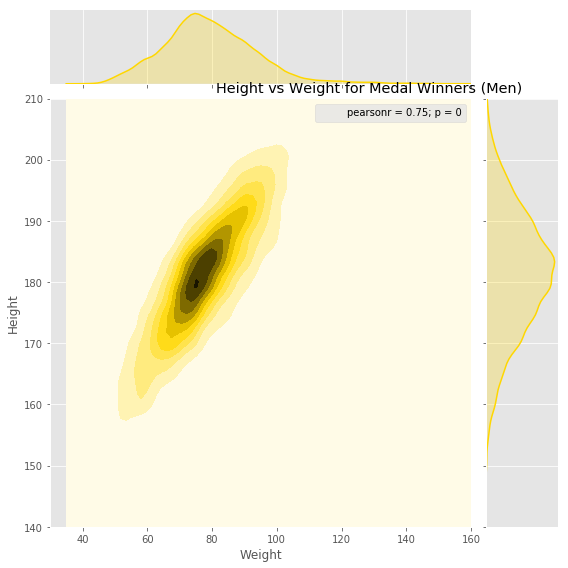

In [35]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = male_summer[male_summer.Medal != 'None'], color='gold',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Medal Winners in Summer Olympics(Men)', fontdict = {'horizontalalignment':'right'})

Text(0.5,1,'Height vs Weight for non-Medal Winners (Men)')

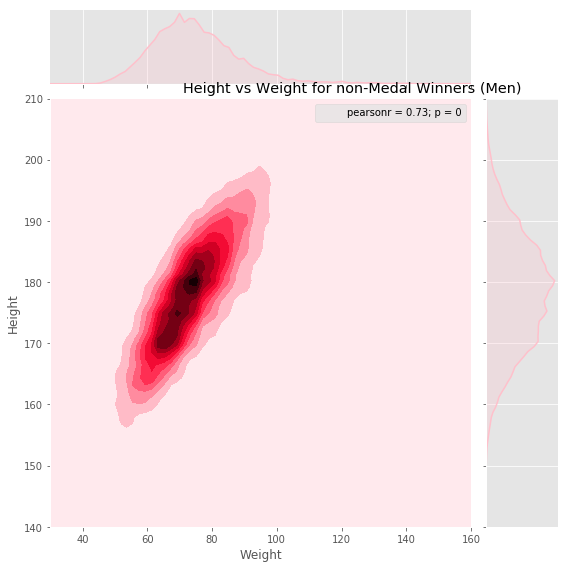

In [36]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height', 
              data = male_summer[male_summer.Medal == 'None'], color='pink',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for non-Medal Winners in Summer Olympics(Men)', fontdict = {'horizontalalignment':'right'})

The above figures indicate that there is usually a linear relationship between height and weights (Expected!), with most of the winners having around 182 cm height and 80 kg weight. But a few curious result were observed:
 - The Height of all Medal winners is distributed normally, while the weights are slightly right-skewed.
 - Athletes who did not win any medal tend to have lighter weight (Max density at around 75, less spread as well)
 - None of the winners were less than about 40 kg in weight.
 
**Note**: These are all priliminary observations, a better understanding can be developed by comparing the same for individual Sport categories 

### 4.2 Female winners in Summer Olympics

Text(0.5,1,'Height vs Weight for Medal winners (Women)')

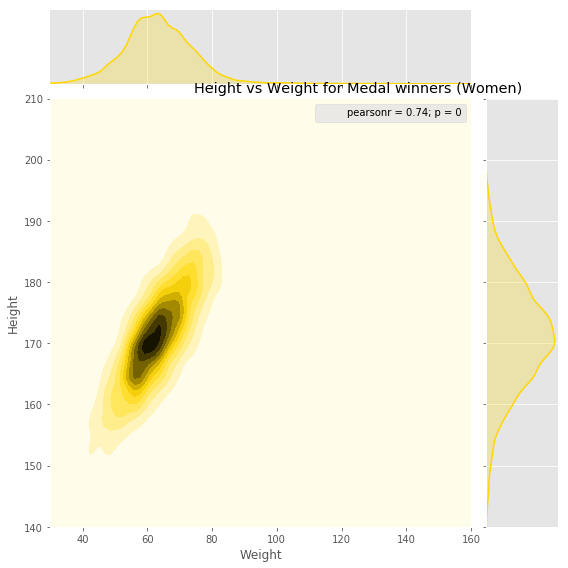

In [38]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = female_summer[female_summer.Medal != 'None'], color='gold',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Medal winners in Summer Olympics(Women)', fontdict = {'horizontalalignment':'right'})

Text(0.5,1,'Height vs Weight for non-Medal winners (Women)')

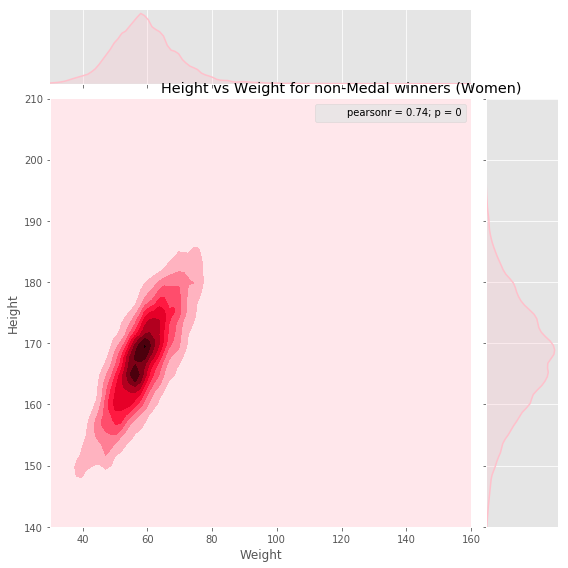

In [39]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = female_summer[female_summer.Medal == 'None'], color='pink',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for non-Medal winners in Summer Olympics(Women)', fontdict = {'horizontalalignment':'right'})

Again, we can see that there is a linear relationship between height and weights , with most of the winners having around 170 cm height and 60 kg weight. A few curious result were observed:

 - The height and weight values for female athletes is less than that for male athletes. (Expected as the physical builds are different)
 - Both, height as well as weight for female athletes seems normally distributed.
 - Female Athletes who did not win any medal tend to have lighter weight as well as lesser height than their counterparts who secured a podium finish. The distribution of height and weight for medal winners is also more concise than other competitors.
 - Taller women have better chance of winning a medal than losing (as per the spread, non-winners tend to tail off at 185 cm height)

### 4.3 Male winners in Winter Olympics

Text(0.5,1,'Height vs Weight for Medal winners (Men)')

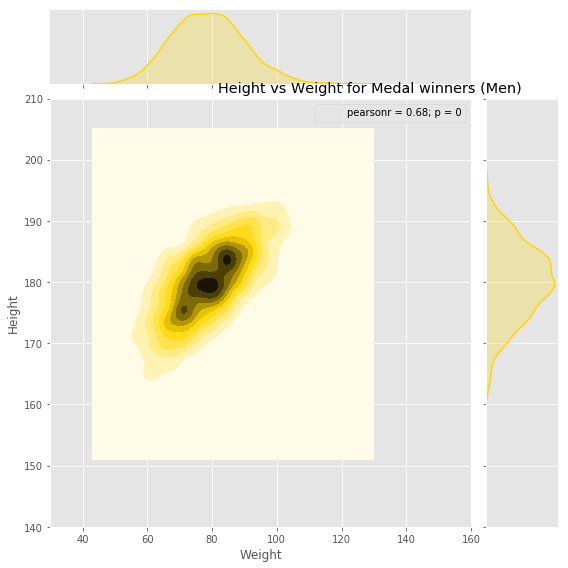

In [43]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = male_winter[male_winter.Medal != 'None'], color='gold',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Medal winners in Winter Olympics(Men)', fontdict = {'horizontalalignment':'right'})

Text(0.5,1,'Height vs Weight for non-Medal winners (Men)')

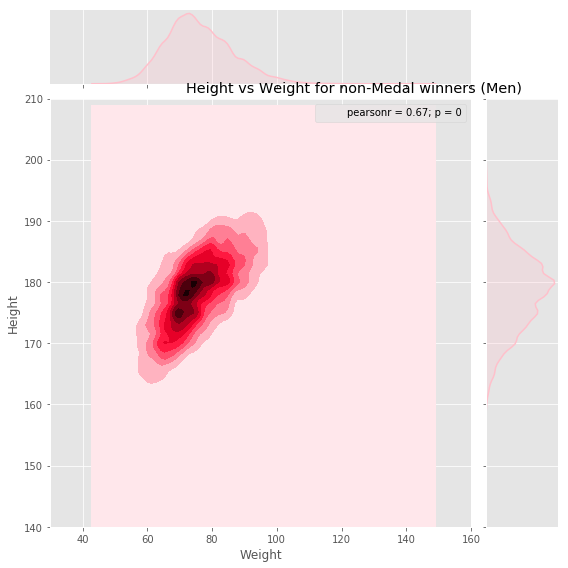

In [44]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = male_winter[male_winter.Medal == 'None'], color='pink',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for non-Medal winners in Winter Olympics(Men)', fontdict = {'horizontalalignment':'right'})

A few notable characteristics of the above figures, both in isolation and in comparison to their Summer Olympics counterpart:
 - Eventhough most of the medal winning mens in winter olympics have similar height (around 180 cm) and weight (around 80 kg) to their summer olympic counterparts, the overall spread of winners across both the weight and height spectrum is less. This can either be due to the lesser sample space available (the number of participants in winter olympics are far less than the summer olympics) or, due to the more rigorous physical demands of winter sports.
 - The height and weight of winners is normally distributed and hence do not show any particular inclination.
 - The winners seem to have a much more compact cluster in terms of height (about 150-205 cm) and weight (about 40-130 kg) and so we can confidently say that male competitors outside this range will not have a podium finish (There are no outlier winners!).
 - Male athletes with less weight have lesser chances to win (Right skewed distribution for weight in non-winners)

### 4.4 Female winners in Winter Olympics

Text(0.5,1,'Height vs Weight for Medal winners (Women)')

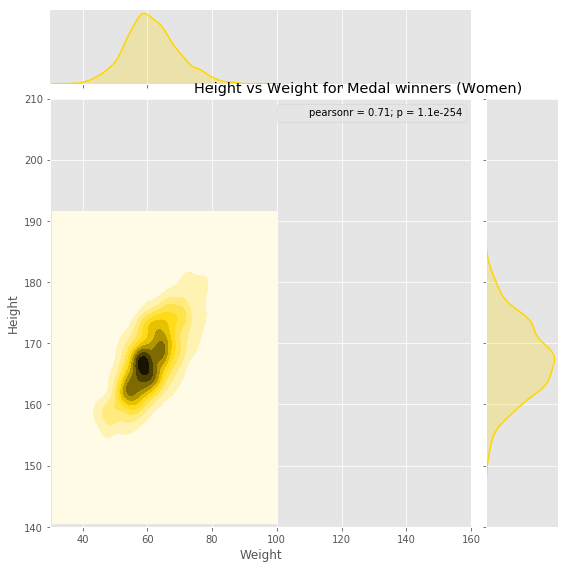

In [46]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = female_winter[female_winter.Medal != 'None'], color='gold',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for Medal winners in Winter Olympics(Women)', fontdict = {'horizontalalignment':'right'})

Text(0.5,1,'Height vs Weight for non-Medal winners (Women)')

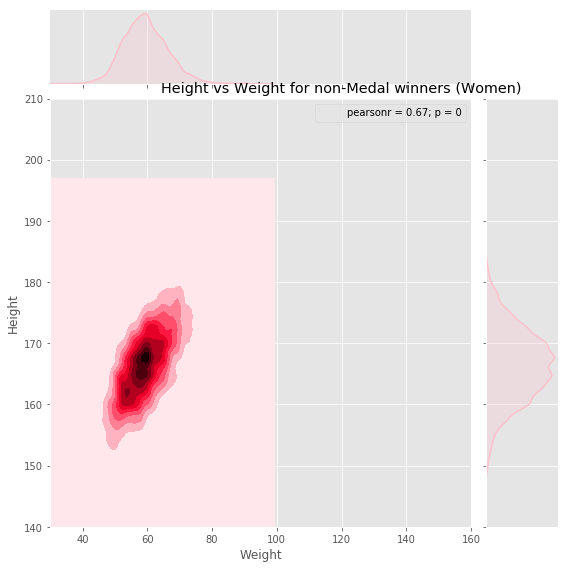

In [47]:
sns.jointplot(kind='kde', x = 'Weight', y = 'Height',
              data = female_winter[female_winter.Medal == 'None'], color='pink',
              size = 8, xlim=(30,160), ylim=(140,210))
plt.title('Height vs Weight for non-Medal winners in Winter Olympics(Women)', fontdict = {'horizontalalignment':'right'})

Few important characteristics of above figures:
 - Both winners and non-winners female athletes seem to show a similar weight vs height distribution characteristics, which makes it difficult to make any prediction about them with just these two parameters.

Let's look at the third important physical aspect available to us in contrast with the probability of winning a medal at the games, 'Age' of the athlete.

## 5. Age of medal winners

Again, we will look at male and female medal winners separately for both summer and winter olympics.

### 5.1 Age Distribution for Summer Olympics

In [184]:
def plot_age(df, pos, name):
    plot = df.groupby(pd.cut(df.Age, np.arange(0,75,10))).Medal.count().plot.barh(ax=pos, figsize = (16,8))
    plot.set_title(name)
    return plot

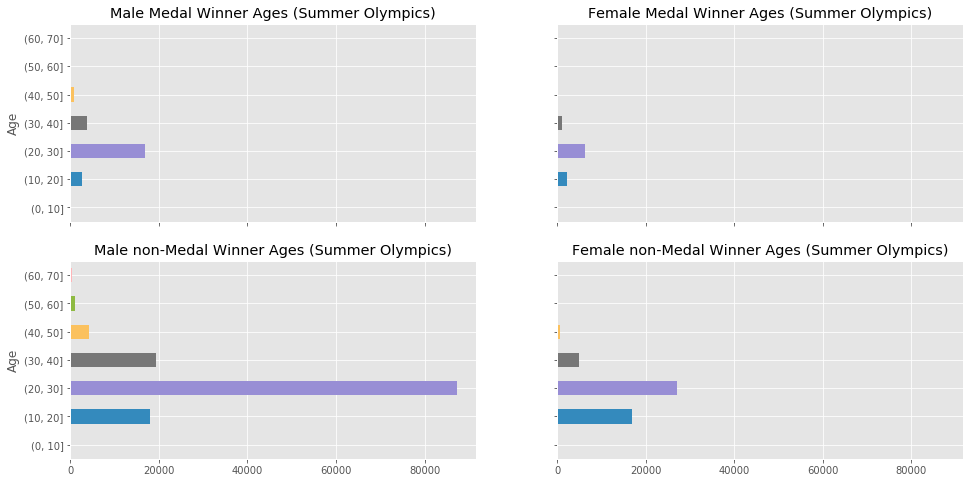

In [189]:
fig, axarr = plt.subplots(2,2,sharex=True, sharey = True)
plot_age(male_summer[male_summer.Medal!='None'], axarr[0][0], 'Male Medal Winner Ages (Summer Olympics)')
plot_age(female_summer[female_summer.Medal!='None'], axarr[0][1], 'Female Medal Winner Ages (Summer Olympics)')
plot_age(male_summer[male_summer.Medal=='None'], axarr[1][0], 'Male non-Medal Winner Ages (Summer Olympics)')
plot_age(female_summer[female_summer.Medal=='None'], axarr[1][1], 'Female non-Medal Winner Ages (Summer Olympics)')

In [217]:
x = male_summer[male_summer.Medal != 'None'].groupby(male_summer[male_summer.Medal != 'None'].Age).Medal.count() / male_summer.groupby('Age').Medal.count()
x.reset_index()


Age     Medal
0   10.0  1.000000
1   11.0       NaN
2   12.0  0.500000
3   13.0  0.085714
4   14.0  0.179487
5   15.0  0.067729
6   16.0  0.079063
7   17.0  0.113579
8   18.0  0.109474
9   19.0  0.125892
10  20.0  0.142545
11  21.0  0.150421
12  22.0  0.158156
13  23.0  0.163654
14  24.0  0.153275
15  25.0  0.158754
16  26.0  0.168929
17  27.0  0.165158
18  28.0  0.165615
19  29.0  0.171606
20  30.0  0.165401
21  31.0  0.164648
22  32.0  0.162850
23  33.0  0.164710
24  34.0  0.159727
25  35.0  0.152123
26  36.0  0.155517
27  37.0  0.147966
28  38.0  0.155963
29  39.0  0.128676
..   ...       ...
44  54.0  0.171233
45  55.0  0.129032
46  56.0  0.163934
47  57.0  0.092308
48  58.0  0.121622
49  59.0  0.071429
50  60.0  0.142857
51  61.0  0.093750
52  62.0       NaN
53  63.0  0.130435
54  64.0  0.100000
55  65.0  0.012821
56  66.0  0.071429
57  67.0       NaN
58  68.0  0.111111
59  69.0  0.022727
60  70.0       NaN
61  71.0  0.060606
62  72.0  0.095238
63  73.0  0.142857
64  74.0       NaN
65  75.0       NaN
66  76.0       NaN
67  77.0       NaN
68  80.0       NaN
69  81.0       NaN
70  84.0       NaN
71  88.0       NaN
72  96.0       NaN
73  97.0       NaN

[74 rows x 2 columns]